<a href="https://colab.research.google.com/github/0xVolt/cemetery-of-culture/blob/main/year-3/neural-networks/5-cnns/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using a ConvNet training it on the CIFAR10 dataset

The CIFAR10 dataset contains 60,000 32x32 3 channel images and is used largely to train ConvNets for Image Classification. We import this dataset from TensorFlow. To know more about the CIFAR10 and the more advanced CIFAR100 datasets, visit [this website](https://www.cs.toronto.edu/~kriz/cifar.html).

## Structuring PyTorch script files
Here's a general purpose template for how to implement models using the PyTorch library.
1. Import dependencies.
2. Make sure you've got gpu support, if not cpu.
3. Define the hyper-parameters for the model to be implemented. These include,

## Installing dependencies

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


## Working with data

Loading the dataset using the `datasets.cifar10.load_data()` method. This returns `X_train`, `y_train`, `X_test` and `y_test` as two tuples.

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()


This means that there are 50,000 images each of size 32pix32pi of 3 channels, namely, R, G and B. 

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

How does each image in `X_train` look like?

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

How does the target variable look like?

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Here, each of the elements in `y_train` are the categories in which the images belong. To simplify, we'll remove all the fluff surrounding the categories. To do this, we'll reshape the array using numpy's `reshape()` method.

`-1` tells `reshape()` to keep that argument the same and the blank *flattens* the argument. 

In [ ]:
y_train = y_train.reshape(-1, )

print(f'Shape: {y_train.shape}\nArray: {y_train}')

Shape: (50000,)
Array: [6 9 9 ... 9 1 1]


Using matplotlib's `imshow()` method to display an image given it's array of pixel values.

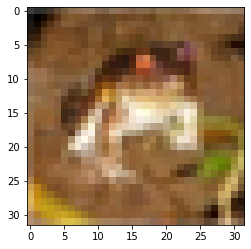

In [ ]:
plt.figure(figsize=(15, 4))
plt.imshow(X_train[0])

Naming all the classes to map them to our categories.

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]